# --- EDA ---

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import string
import re

Load the dataset

In [6]:
# Load the dataset
df = pd.read_csv('c:/Users/HP/Documents/GitHub/sentiment-analysis-amazon-reviews/Reviews.csv')

In [7]:
# First few rows of the dataset to understand its structure
df.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...


In [8]:
# data structure
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 568454 entries, 0 to 568453
Data columns (total 10 columns):
 #   Column                  Non-Null Count   Dtype 
---  ------                  --------------   ----- 
 0   Id                      568454 non-null  int64 
 1   ProductId               568454 non-null  object
 2   UserId                  568454 non-null  object
 3   ProfileName             568428 non-null  object
 4   HelpfulnessNumerator    568454 non-null  int64 
 5   HelpfulnessDenominator  568454 non-null  int64 
 6   Score                   568454 non-null  int64 
 7   Time                    568454 non-null  int64 
 8   Summary                 568427 non-null  object
 9   Text                    568454 non-null  object
dtypes: int64(5), object(5)
memory usage: 43.4+ MB


In [9]:
# Drop duplicates and missing values
# df.dropna(inplace=True)
# df.drop_duplicates(inplace=True)

Handle Missing Values

In [10]:
# Check for Missing Values
# This helps us identify which columns need cleaning
missing_data = df.isnull().sum()
print(missing_data)

Id                         0
ProductId                  0
UserId                     0
ProfileName               26
HelpfulnessNumerator       0
HelpfulnessDenominator     0
Score                      0
Time                       0
Summary                   27
Text                       0
dtype: int64


In [11]:
# Drop rows with missing values in 'ProfileName' and 'Summary'
# These two columns have very few missing values, so it's safe to remove those rows
df = df.dropna(subset=['Summary', 'ProfileName'])

In [12]:
# Verify if there are still any missing values
# This should show zero missing values for 'ProfileName' and 'Summary'
print(df.isnull().sum())

Id                        0
ProductId                 0
UserId                    0
ProfileName               0
HelpfulnessNumerator      0
HelpfulnessDenominator    0
Score                     0
Time                      0
Summary                   0
Text                      0
dtype: int64


Sentiment Labeling based on Score

In [13]:
# function to assign sentiment based on the score
def label_sentiment(score):
    if score <= 2:
        return 'Negative'
    elif score == 3:
        return 'Neutral'
    else:
        return 'Positive'

In [14]:
# Apply the sentiment labeling function to the 'Score' column
df['Sentiment'] = df['Score'].apply(label_sentiment)

In [15]:
df.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text,Sentiment
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...,Positive
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...,Negative
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...,Positive
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...,Negative
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...,Positive


Sentiment Distribution Visualization

In [16]:
sns.set(style='whitegrid')

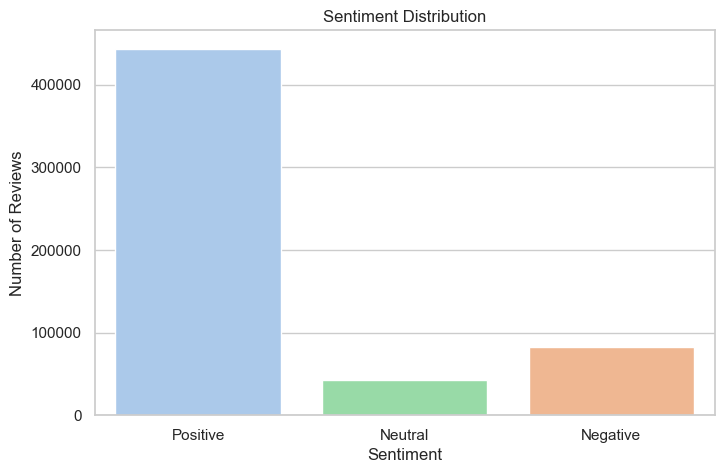

In [17]:
# Plot sentiment distribution

plt.figure(figsize=(8, 5))
sns.countplot(data=df, x='Sentiment', hue='Sentiment', palette='pastel', order=['Positive', 'Neutral', 'Negative'], legend=False)
plt.title('Sentiment Distribution')
plt.xlabel('Sentiment')
plt.ylabel('Number of Reviews')
plt.show()

In [18]:
# Percentage distribution of sentiments
sentiment_percent = df['Sentiment'].value_counts(normalize=True) * 100
print("Sentiment Percentage Breakdown:\n")
print(sentiment_percent)

Sentiment Percentage Breakdown:

Sentiment
Positive    78.070939
Negative    14.427666
Neutral      7.501394
Name: proportion, dtype: float64


Text Cleaning and Preprocessing using NLTK

In [19]:
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('omw-1.4')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\HP\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\HP\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\HP\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\HP\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

In [20]:
# Initialize stopwords and lemmatizer
stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

In [21]:
# Define a function to clean and preprocess text
def clean_text(text):
    # Convert text to lowercase
    text = text.lower()
    
    # Remove punctuation and special characters
    text = re.sub(f"[{re.escape(string.punctuation)}]", "", text)
    
    # Remove numbers
    text = re.sub(r"\d+", "", text)
    
    # Tokenize the text
    tokens = nltk.word_tokenize(text)
    
    # Remove stopwords and lemmatize each word
    cleaned_tokens = [lemmatizer.lemmatize(word) for word in tokens if word not in stop_words]
    
    # Join tokens back to string
    cleaned_text = " ".join(cleaned_tokens)
    
    return cleaned_text

In [22]:
# Apply cleaning to the 'Text' column
df['CleanedText'] = df['Text'].apply(clean_text)

In [23]:
df.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text,Sentiment,CleanedText
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...,Positive,bought several vitality canned dog food produc...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...,Negative,product arrived labeled jumbo salted peanutsth...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...,Positive,confection around century light pillowy citrus...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...,Negative,looking secret ingredient robitussin believe f...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...,Positive,great taffy great price wide assortment yummy ...


# --- MODEL PREPARATION ---

In [24]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
import joblib

In [25]:
# Prepare data for modeling
X = df['CleanedText']
y = df['Sentiment']

In [26]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42) # 80% train, 20% test, fixed random state for reproducibility

In [27]:
# Vectorize the text data using TF-IDF
vectorizer = TfidfVectorizer(max_features=5000)  # You can adjust max_features
X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)

In [28]:
# Vectorize the text data using TF-IDF
vectorizer = TfidfVectorizer(max_features=5000)  # can adjust max_features to control vocabulary size
X_train_vec = vectorizer.fit_transform(X_train) # Learn vocabulary and transform training data
X_test_vec = vectorizer.transform(X_test)     # Apply the same transformation to test data

In [29]:
# Train a Logistic Regression model
model = LogisticRegression(solver='liblinear', random_state=42) # Using liblinear solver for smaller datasets, fixed random state
model.fit(X_train_vec, y_train) # Train the model

LogisticRegression(random_state=42, solver='liblinear')

In [30]:
# Make predictions
y_pred = model.predict(X_test_vec) # Predict on the test set

In [31]:
# Evaluate the model
print("Classification Report:\n", classification_report(y_test, y_pred)) # Detailed classification metrics
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))          # Show true vs. predicted labels
print("Accuracy:", accuracy_score(y_test, y_pred))                      # Overall accuracy

Classification Report:
               precision    recall  f1-score   support

    Negative       0.74      0.66      0.70     16452
     Neutral       0.56      0.15      0.23      8460
    Positive       0.89      0.97      0.93     88769

    accuracy                           0.87    113681
   macro avg       0.73      0.59      0.62    113681
weighted avg       0.84      0.87      0.84    113681

Confusion Matrix:
 [[10828   437  5187]
 [ 1823  1247  5390]
 [ 1905   556 86308]]
Accuracy: 0.8654304589157379


In [32]:
# Save the model and vectorizer
joblib.dump(model, 'model_classifier.pkl')
joblib.dump(vectorizer, 'tfidf_vectorizer.pkl')

['tfidf_vectorizer.pkl']

In [33]:
print("Model and vectorizer saved successfully!")

Model and vectorizer saved successfully!


Testing

In [34]:
new_review = "I hated this product"

In [35]:
# Apply the same cleaning function used on the training data
cleaned_review = clean_text(new_review)

In [36]:
# Transform the cleaned review using the loaded vectorizer
new_review_vectorized = vectorizer.transform([cleaned_review])

In [37]:
# Predict the sentiment
predicted_sentiment = model.predict(new_review_vectorized)

# Output the predicted sentiment
print("Predicted Sentiment:", predicted_sentiment[0])

Predicted Sentiment: Negative
